# Comparing classification models

In this notebook we compare the following classification models:

- **Logistic Regression**: a widely used traditional classification model
- **Decision Tree**: an easily illustrated model
- **Random Forest**: an effective method that is particularly suitable for avoiding overfitting
- **Gradient Boosting**: an effective method that often gives more accurate predictions than other methods

Of the models used, Random Forest and Gradient Boosting are so-called ensemble models, in which the model is a combination of several models.

In [1]:
### Importing the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Importing more libraries

### train_test_split can split data into train data and test data

from sklearn.model_selection import train_test_split

### Models used

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Assessing the accuracy of the models

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report 

### This is required in older versions
#from sklearn.metrics import plot_confusion_matrix

### For drawing the decision tree

from sklearn.tree import plot_tree

%matplotlib inline


### Data review

In [3]:
### Opening the data in a dataframe

df=pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/en/heart.xlsx')

### View the basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nro                       299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   serum_sodium              299 non-null    int64  
 10  sex                       299 non-null    int64  
 11  smoking                   299 non-null    int64  
 12  time                      299 non-null    int64  
 13  DEATH_EVENT               299 non-null    int64  
dtypes: float64

The variable to be predicted in this analysis is **DEATH_EVENT**.

You can review the original article and explanation of the variables on the Kaggle's page https://www.kaggle.com/code/nayansakhiya/heart-fail-analysis-and-quick-prediction/notebook. In particular, note that the value zero of the variable DEATH_EVENT has the meaning **"no"** and the value one means **"yes"**.

In [4]:
### Getting acquainted with the data.

df

,nro,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,2,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,3,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,4,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,5,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,295,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,296,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,297,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,298,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
### Let's have a look at the distribution of the values of the target variable.

df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<Axes: >

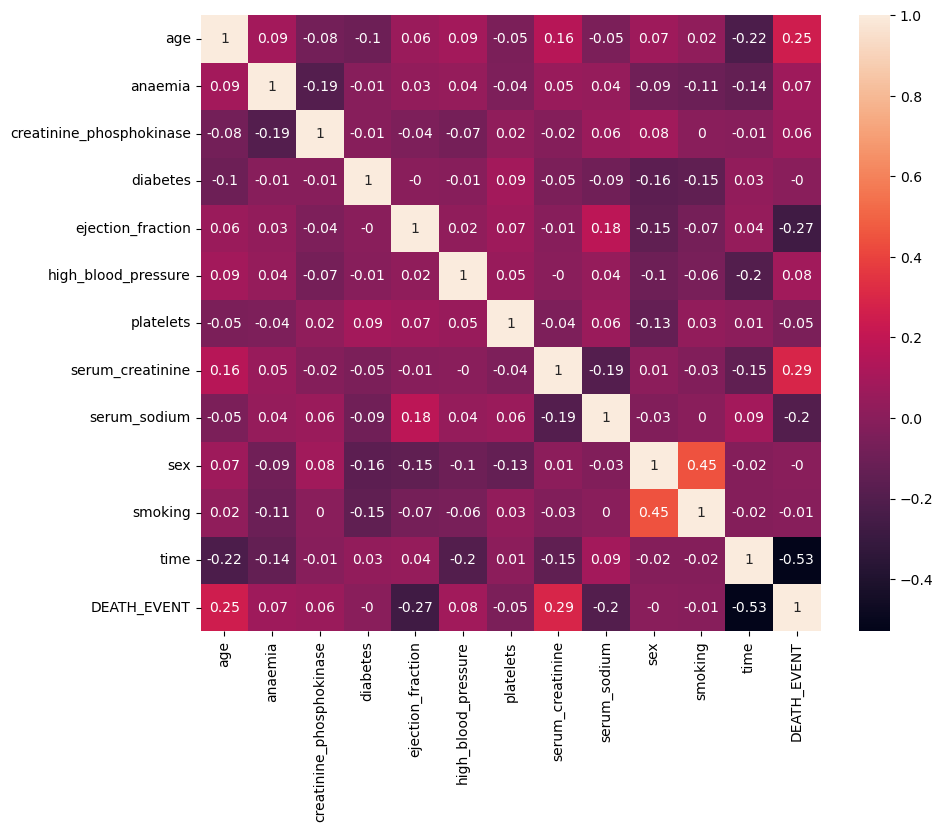

In [6]:
### Correlations

plt.figure(figsize = (10, 8))
sns.heatmap(df.drop('nro', axis = 1).corr().round(2), annot = True)

Select the independent variables that have the highest correlations with the predicted (dependent) variable.

<Axes: xlabel='DEATH_EVENT', ylabel='time'>

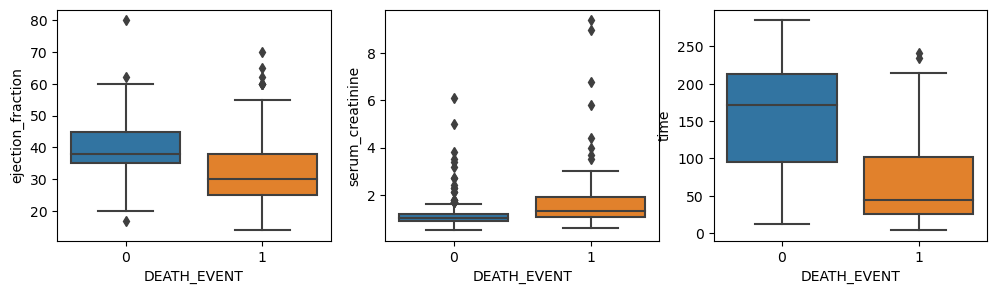

In [7]:
### Let's see how well the variables with the highest correlation distinguish between survivors (0) and deceased (1).

fig, axes = plt.subplots(1, 3, figsize = (12,3))

sns.boxplot(x = 'DEATH_EVENT', y = 'ejection_fraction', data = df, ax = axes[0])
sns.boxplot(x = 'DEATH_EVENT', y = 'serum_creatinine', data = df, ax = axes[1])
sns.boxplot(x = 'DEATH_EVENT', y = 'time', data = df, ax = axes[2])

The three selected variables do not seem to very well distinguish between survivors and deceased. However, it turns out that together these variables give a good model.

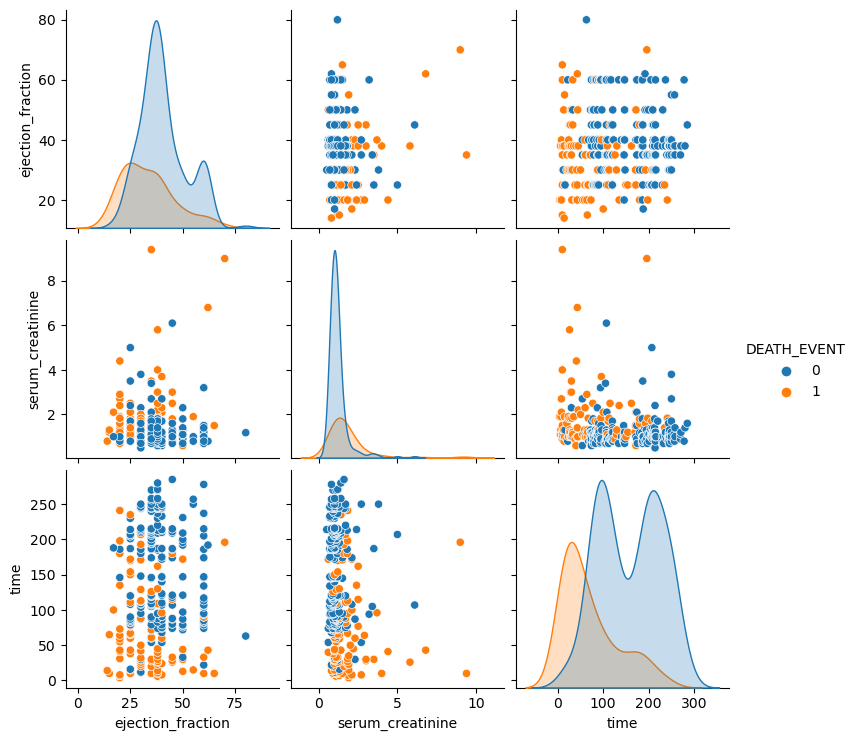

In [8]:
### Let's see distinctiveness also as scatter charts.

sns.pairplot(df[['ejection_fraction', 'serum_creatinine', 'time', 'DEATH_EVENT']], hue = 'DEATH_EVENT')

## Model fitting

In [9]:
### Independent variables

X = df[['ejection_fraction', 'serum_creatinine', 'time']]

### The predicted variable

y = df['DEATH_EVENT']

### Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

A fixed value is used with the **random_state** parameter to obtain train and test data for the same division at different times. If the value is changed then different divisions are obtained and, as a result, slightly different models are obtained.

In [10]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

model2 = DecisionTreeClassifier(max_depth = 4, random_state = 2)
model2.fit(X_train, y_train)

model3 = RandomForestClassifier(max_depth = 3, random_state = 2)
model3.fit(X_train, y_train)

model4 = GradientBoostingClassifier(max_depth = 3, random_state = 2)
model4.fit(X_train, y_train)

GradientBoostingClassifier(random_state=2)

**Random Forest** and **Gradient Boosting** are combination models of several decision trees. The number of branching of decision trees is controlled by the max_depth parameter. You can also try other values.

## Accuracy of models

In [11]:
### Calculation of predictions according to the model for train data and test data

y_train_model1 = model1.predict(X_train)
y_test_model1 = model1.predict(X_test)

y_train_model2 = model2.predict(X_train)
y_test_model2 = model2.predict(X_test)

y_train_model3 = model3.predict(X_train)
y_test_model3 = model3.predict(X_test)

y_train_model4 = model4.predict(X_train)
y_test_model4 = model4.predict(X_test)


In [12]:
### Proportion of correct predictions in the train data

print('Accuracy of predictions in the train data:')
print(f'Logistic Regression {accuracy_score(y_train, y_train_model1):.3f}')
print(f'Decision Tree {accuracy_score(y_train, y_train_model2):.3f}')
print(f'Random Forest {accuracy_score(y_train, y_train_model3):.3f}')
print(f'Gradient Boosting {accuracy_score(y_train, y_train_model4):.3f}')

Accuracy of predictions in the train data:
Logistic Regression 0.817
Decision Tree 0.893
Random Forest 0.884
Gradient Boosting 0.960


In [13]:
### Proportion of correct predictions in the test data

print('Accuracy of predictions in the test data:')
print(f'Logistic Regression {accuracy_score(y_test, y_test_model1):.3f}')
print(f'Decision Tree {accuracy_score(y_test, y_test_model2):.3f}')
print(f'Random Forest {accuracy_score(y_test, y_test_model3):.3f}')
print(f'Gradient Boosting {accuracy_score(y_test, y_test_model4):.3f}')

Accuracy of predictions in the test data:
Logistic Regression 0.880
Decision Tree 0.907
Random Forest 0.920
Gradient Boosting 0.920


All the models applied are pretty good.

Next, let's have a look at the confusion matrix of the Gradient Boosting model.

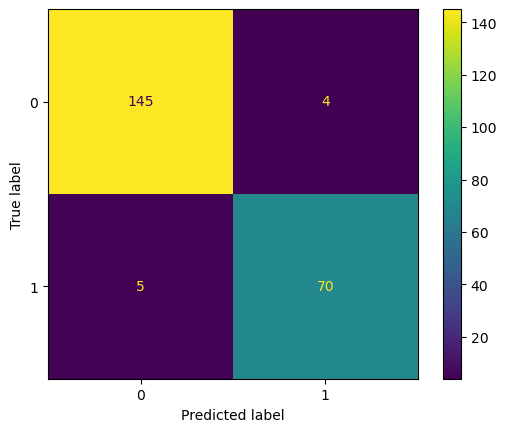

In [14]:
cm = confusion_matrix(y_train, y_train_model4)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Next one works with older versions.
#plot_confusion_matrix(model4, X_train, y_train)

The Gradient Boosting technique predicted in the train data four survivors to be mistakenly deceased and five deceased remained unidentified.

How about the confusion matrix applied to the test data?

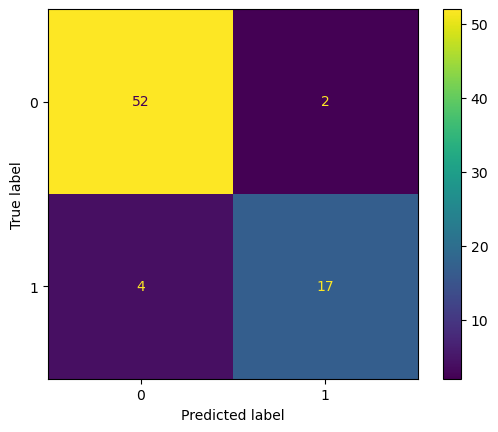

In [15]:
cm = confusion_matrix(y_test, y_test_model4)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Next one works with older versions.
#plot_confusion_matrix(model4, X_test, y_test)

In the test data, the Gradient Boosting technique incorrectly predicted two survivors to be deceased and four deceased were unidentified.

**Explanation**
- Of the survivors, 52 were correctly predicted to be survivors and two were incorrectly predicted to be deceased.
- Of the deceased, 17 were correctly predicted to be deceased and four were incorrectly predicted to have survived. 

Let's also consider the classification report for the test data.

In [16]:
### Classification report for the test data (Gradient Boosting)

print(classification_report(y_test, y_test_model4))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.89      0.81      0.85        21

    accuracy                           0.92        75
   macro avg       0.91      0.89      0.90        75
weighted avg       0.92      0.92      0.92        75



- A total of 75 people.
- Of these 52+17 were correctly predicted: accuracy (52+17)/75 = 0,92 = 92 %
- Precision for 0: 52+4 were predicted as survivors, of which 52/56 = 0,93 = 93 % were correctly predicted.
- Precision for 1: 19 were predicted to be deceased, of which 17/19 = 0.89 = 89 % were correctly predicted.
- The numbers in the recall column are calculated accordingly, but the figures are taken from the rows of the confusion matrix.

Accuracy of the decision tree was not the highest of the models. However, it is rather illustrative.

[Text(0.4375, 0.9, 'x[2] <= 67.5\ngini = 0.445\nsamples = 224\nvalue = [149, 75]'),
 Text(0.20833333333333334, 0.7, 'x[0] <= 72.5\ngini = 0.274\nsamples = 55\nvalue = [9, 46]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= 0.7\ngini = 0.252\nsamples = 54\nvalue = [8, 46]'),
 Text(0.08333333333333333, 0.3, 'x[0] <= 39.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.3, 'x[0] <= 36.5\ngini = 0.233\nsamples = 52\nvalue = [7, 45]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.312\nsamples = 31\nvalue = [6, 25]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'x[1] <= 1.45\ngini = 0.284\nsamples = 169\nvalue = [140, 29]'),
 Text(0.5, 0.5, 'x[0] <= 27.5\ngini = 0.151\nsamples = 134\nvalue = [123, 11]'),
 Text(0.4166666666666667

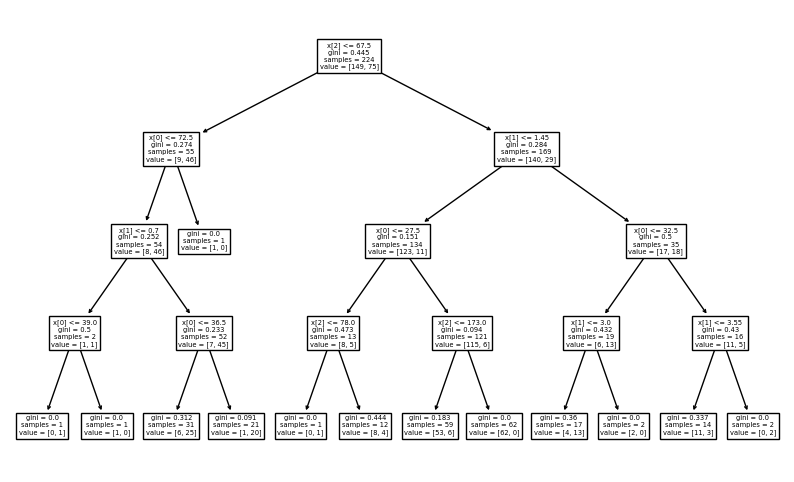

In [17]:
### Let's reserve some space for the figure.

plt.figure(figsize = (10,6))

### Decision tree of the train data.

plot_tree(model2)

## Use of the model for prediction

In [18]:
### Data for two new people

Xnew = pd.DataFrame([[20, 5, 10], [50, 2, 80]], columns = ['ejection_fraction', 'serum_creatinine', 'time'])
Xnew

,ejection_fraction,serum_creatinine,time
0,20,5,10
1,50,2,80


In [19]:
prediction = model4.predict(Xnew)
probability = model4.predict_proba(Xnew).round(2)
Xnew['prediction'] = prediction
Xnew[['DEATH_EVENT 0', 'DEATH_EVENT 1']] = probability
Xnew

,ejection_fraction,serum_creatinine,time,prediction,DEATH_EVENT 0,DEATH_EVENT 1
0,20,5,10,1,0.02,0.98
1,50,2,80,0,0.65,0.35


The Gradient Boosting model predicts the first patient to pass away with a 98 % probability and the second to cope with a 65 % probability.

### Further information

Ideas from the next source have been quoted for this article https://www.kaggle.com/nayansakhiya/heart-fail-analysis-and-quick-prediction/notebook.

Backgroud on the Ensemble methods: https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205.

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>.

In [20]:
import datetime
print(f'Last modified {datetime.datetime.now():%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2023-03-20 20:44 by Juha Nurmonen
